# Data Science Final Project
Charles Laurent, Jenny Park, AJ Marino

## Part 1b - Box Plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn import cluster

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [3]:
# TODO - Update path to files
datadir='../dev/project/CollegeScorecard_Raw_Data'

# TODO set features_dir 
features_dir = './data'

In [4]:
# import collegedatalib
import collegedatahelper

In [5]:
%%time
data_dict = collegedatahelper.create_data_dict(datadir, features_dir)

CPU times: user 57 s, sys: 8.58 s, total: 1min 5s
Wall time: 1min


In [6]:
df = data_dict['2012_13']
df_13 = data_dict['2013_14']
df_new = data_dict['2017_18']

In [7]:
# CONTROL 
# 1 - Public
# 2 - Private non-profit
# 3 - Private for-profit
df_pub = df_13['public']
df_priv = df_13['private']
df_priv_profit = df_13['private_for_profit']

In [8]:
#df_priv.dropna(axis=0,how='all',inplace=True)    #covariance matrix
df_priv.head()
#df_priv.shape
#covmat = df_priv.cov()
#cormat = df_priv.corr()

,CONTROL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CIP01CERT4,CIP01BACHL,CIP03CERT1,CIP03CERT2,CIP03ASSOC,CIP03CERT4,CIP03BACHL,CIP04CERT1,CIP04CERT2,CIP04ASSOC,CIP04CERT4,CIP04BACHL,CIP05CERT1,CIP05CERT2,CIP05ASSOC,CIP05CERT4,CIP05BACHL,CIP09CERT1,CIP09CERT2,CIP09ASSOC,CIP09CERT4,CIP09BACHL,CIP10CERT1,CIP10CERT2,CIP10ASSOC,CIP10CERT4,CIP10BACHL,CIP11CERT1,CIP11CERT2,CIP11ASSOC,CIP11CERT4,CIP11BACHL,CIP12CERT1,CIP12CERT2,CIP12ASSOC,CIP12CERT4,CIP12BACHL,CIP13CERT1,CIP13CERT2,CIP13ASSOC,CIP13CERT4,CIP13BACHL,CIP14CERT1,CIP14CERT2,CIP14ASSOC,CIP14CERT4,CIP14BACHL,CIP15CERT1,CIP15CERT2,CIP15ASSOC,CIP15CERT4,CIP15BACHL,CIP16CERT1,CIP16CERT2,CIP16ASSOC,CIP16CERT4,CIP16BACHL,CIP19CERT1,CIP19CERT2,CIP19ASSOC,CIP19CERT4,CIP19BACHL,CIP22CERT1,CIP22CERT2,CIP22ASSOC,CIP22CERT4,CIP22BACHL,CIP23CERT1,CIP23CERT2,CIP23ASSOC,CIP23CERT4,CIP23BACHL,CIP24CERT1,CIP24CERT2,CIP24ASSOC,CIP24CERT4,CIP24BACHL,CIP25CERT1,CIP25CERT2,CIP25ASSOC,CIP25CERT4,CIP25BACHL,CIP26CERT1,CIP26CERT2,CIP26ASSOC,CIP26CERT4,CIP26BACHL,CIP27CERT1,CIP27CERT2,CIP27ASSOC,CIP27CERT4,CIP27BACHL,CIP29CERT1,CIP29CERT2,CIP29ASSOC,CIP29CERT4,CIP29BACHL,CIP30CERT1,CIP30CERT2,CIP30ASSOC,CIP30CERT4,CIP30BACHL,CIP31CERT1,CIP31CERT2,CIP31ASSOC,CIP31CERT4,CIP31BACHL,CIP38CERT1,CIP38CERT2,CIP38ASSOC,CIP38CERT4,CIP38BACHL,CIP39CERT1,CIP39CERT2,CIP39ASSOC,CIP39CERT4,CIP39BACHL,CIP40CERT1,CIP40CERT2,CIP40ASSOC,CIP40CERT4,CIP40BACHL,CIP41CERT1,CIP41CERT2,CIP41ASSOC,CIP41CERT4,CIP41BACHL,CIP42CERT1,CIP42CERT2,CIP42ASSOC,CIP42CERT4,CIP42BACHL,CIP43CERT1,CIP43CERT2,CIP43ASSOC,CIP43CERT4,CIP43BACHL,CIP44CERT1,CIP44CERT2,CIP44ASSOC,CIP44CERT4,CIP44BACHL,CIP45CERT1,CIP45CERT2,CIP45ASSOC,CIP45CERT4,CIP45BACHL,CIP46CERT1,CIP46CERT2,CIP46ASSOC,CIP46CERT4,CIP46BACHL,CIP47CERT1,CIP47CERT2,CIP47ASSOC,CIP47CERT4,CIP47BACHL,CIP48CERT1,CIP48CERT2,CIP48ASSOC,CIP48CERT4,CIP48BACHL,CIP49CERT1,CIP49CERT2,CIP49ASSOC,CIP49CERT4,CIP49BACHL,CIP50CERT1,CIP50CERT2,CIP50ASSOC,CIP50CERT4,CIP50BACHL,CIP51CERT1,CIP51CERT2,CIP51ASSOC,CIP51CERT4,CIP51BACHL,CIP52CERT1,CIP52CERT2,CIP52ASSOC,CIP52CERT4,CIP52BACHL,CIP54CERT1,CIP54CERT2,CIP54ASSOC,CIP54CERT4,CIP54BACHL,UGDS,UG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,UGDS_WHITENH,UGDS_BLACKNH,UGDS_API,UGDS_AIANOLD,UGDS_HISPOLD,UG_NRA,UG_UNKN,UG_WHITENH,UG_BLACKNH,UG_API,UG_AIANOLD,UG_HISPOLD,PPTUG_EF,PPTUG_EF2,NPT4_PUB,NPT4_PRIV,NPT4_PROG,NPT4_OTHER,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT41_PROG,NPT42_PROG,NPT43_PROG,NPT44_PROG,NPT45_PROG,NPT41_OTHER,NPT42_OTHER,NPT43_OTHER,NPT44_OTHER,NPT45_OTHER,NPT4_048_PUB,NPT4_048_PRIV,NPT4_048_PROG,NPT4_048_OTHER,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NPT4_3075_PROG,NPT4_3075_OTHER,NPT4_75UP_PROG,NPT4_75UP_OTHER,NUM4_PUB,NUM4_PRIV,NUM4_PROG,NUM4_OTHER,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,NUM41_PROG,NUM42_PROG,NUM43_PROG,NUM44_PROG,NUM45_PROG,NUM41_OTHER,NUM42_OTHER,NUM43_OTHER,NUM44_OTHER,NUM45_OTHER,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,PFTFTUG1_EF,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,UG25ABV,AGE_ENTRY_SQ,AGEGE24,LNFAMINC,LNFAMINC_IND,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,FSEND_COUNT,FSEND_1,FSEND_2,FSEND_3,FSEND_4,FSEND_5,UGDS_MEN,UGDS_WOMEN,D_PCTPELL_PCTFLOAN,UGNONDS,GRADS,RET_FT4_POOLED,RET_FTL4_POOLED,RET_PT4_POOLED,RET_PTL4_POOLED,RET_FT_DEN4_POOLED

In [9]:
frames = ['df_pub', 'df_priv', 'df_priv_profit']
for i, frame in enumerate([df_pub, df_priv, df_priv_profit]):
    debt2income_mat=frame[['CONTROL','debt_to_income']]#df_priv[['DEBT_MDN','MD_EARN_WNE_P10']]
    thisKMeans = cluster.KMeans(2) #12 clusters
    thisKMeans.fit(debt2income_mat)
    clusterDistances = thisKMeans.transform(debt2income_mat) #distances from each center
    frame['cluster'] = thisKMeans.predict(debt2income_mat)
    mean = (frame[frame['cluster']==0]['debt_to_income'].mean() + frame[frame['cluster']==1]['debt_to_income'].mean()) / 2 # CLUSTERS OF INDEBTEDNESS
    print(f'{frames[i]}: {mean}')
    print(f'{frames[i]} - max: {frame.debt_to_income.max()}')
    frame['higheravgdebt'] = (frame['debt_to_income'] > mean).astype(int)
    

df_pub: 0.3188772765763272
df_pub - max: 1.0534037558685445
df_priv: 0.5012136453806203
df_priv - max: 1.6485507246376812
df_priv_profit: 0.4685967236694537
df_priv_profit - max: 1.4485981308411215


In [10]:
"""
for frame in [df_pub, df_priv, df_priv_profit]:
    frame['higheravgdebt'] = (frame['debt_to_income'] > 0.5).astype(int)
    print(frame['higheravgdebt'].head())
    """

"\nfor frame in [df_pub, df_priv, df_priv_profit]:\n    frame['higheravgdebt'] = (frame['debt_to_income'] > 0.5).astype(int)\n    print(frame['higheravgdebt'].head())\n    "

# Private Schools

Does the lack of diversity of a university affect the debt ratio? 

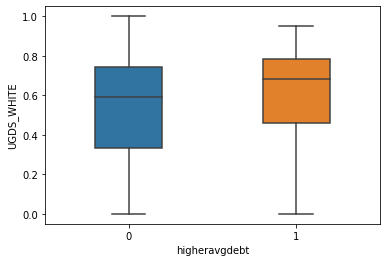

In [11]:
sns.boxplot("higheravgdebt", "UGDS_WHITE", width=0.4, data=df_priv)
plt.show()

Does the percentage of business majors matter?

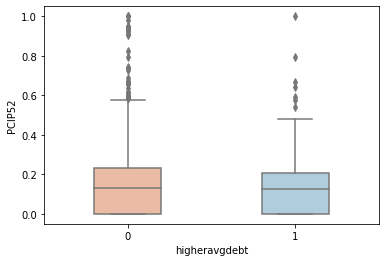

In [12]:
sns.boxplot("higheravgdebt", "PCIP52", width=0.4, data=df_priv, palette='RdBu')
plt.show()

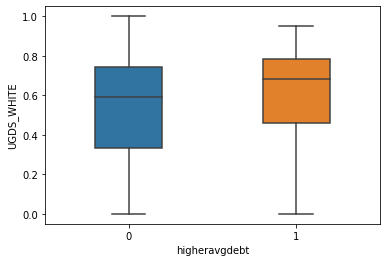

In [13]:
sns.boxplot("higheravgdebt", "UGDS_WHITE", width=0.4, data=df_priv)
plt.show()

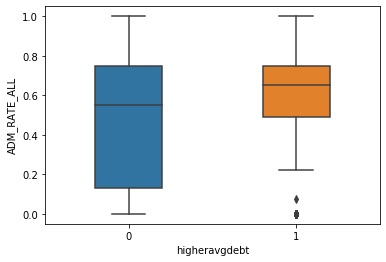

In [14]:
sns.boxplot("higheravgdebt", "ADM_RATE_ALL", width=0.4, data=df_priv)
plt.show()

# Public Schools

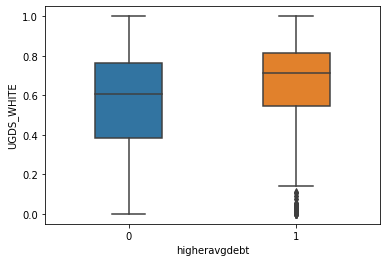

In [15]:
sns.boxplot("higheravgdebt", "UGDS_WHITE", width=0.4, data=df_pub)
plt.show()

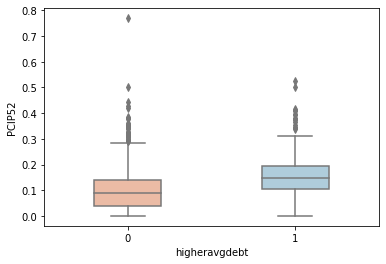

In [16]:
sns.boxplot("higheravgdebt", "PCIP52", width=0.4, data=df_pub, palette='RdBu')
plt.show()

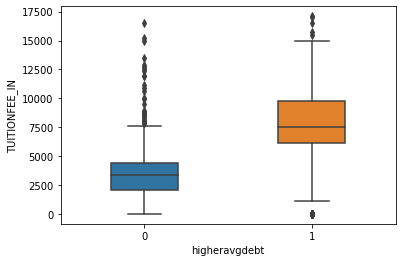

In [17]:
sns.boxplot("higheravgdebt", "TUITIONFEE_IN", width=0.4, data=df_pub)
plt.show()

Avg price for 30-70K income

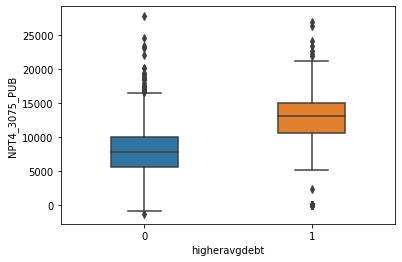

In [18]:
sns.boxplot("higheravgdebt", "NPT4_3075_PUB", width=0.4, data=df_pub)
plt.show()

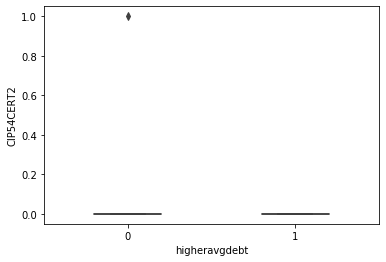

In [19]:
sns.boxplot("higheravgdebt", "CIP54CERT2", width=0.4, data=df_pub)
plt.show()

# Private Schools for Profit

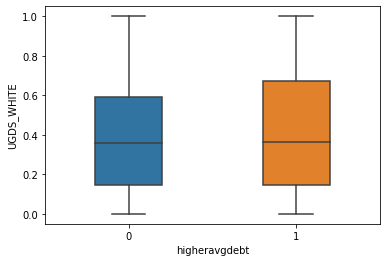

In [20]:
sns.boxplot("higheravgdebt", "UGDS_WHITE", width=0.4, data=df_priv_profit)
plt.show()

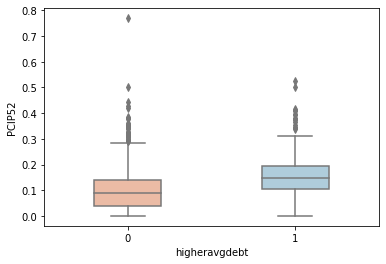

In [21]:
sns.boxplot("higheravgdebt", "PCIP52", width=0.4, data=df_pub, palette='RdBu')
plt.show()

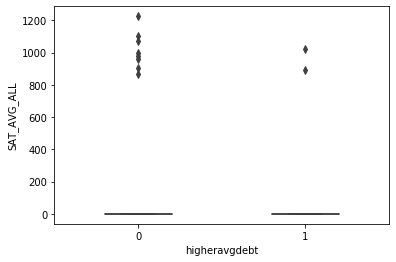

In [22]:
sns.boxplot("higheravgdebt", "SAT_AVG_ALL", width=0.4, data=df_priv_profit)
plt.show()

# 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5a7aa510>]],
      dtype=object)

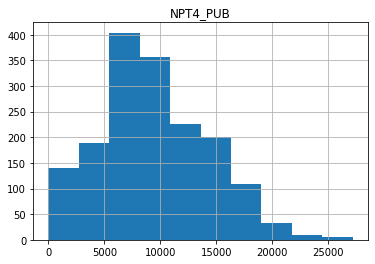

In [23]:
df_pub.hist(column='NPT4_PUB')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3dba2b10>]],
      dtype=object)

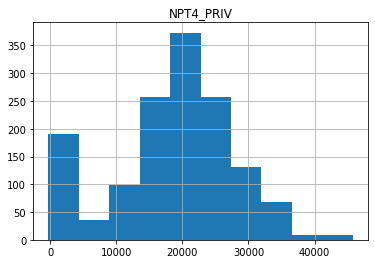

In [24]:
df_priv.hist(column='NPT4_PRIV')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a64295410>]],
      dtype=object)

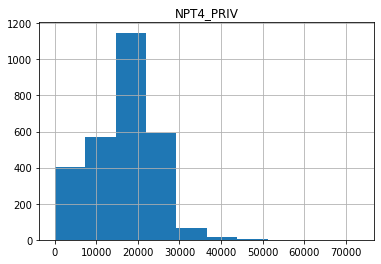

In [25]:
df_priv_profit.hist(column='NPT4_PRIV')